In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wine.csv')
df

Wine  Alcohol  Malic_acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0       1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1       1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2       1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3       1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4       1    13.24        2.59  2.87  21.0  118     2.80        2.69   
..    ...      ...         ...   ...   ...  ...      ...         ...   
173     3    13.71        5.65  2.45  20.5   95     1.68        0.61   
174     3    13.40        3.91  2.48  23.0  102     1.80        0.75   
175     3    13.27        4.28  2.26  20.0  120     1.59        0.69   
176     3    13.17        2.59  2.37  20.0  120     1.65        0.68   
177     3    14.13        4.10  2.74  24.5   96     2.05        0.76   

     Nonflavanoid_phenols  Proanth  Color_intensity   Hue    OD  Proline  
0                    0.28     2.29             5.64  1.04  3.92     1065  
1                    0.26     1.28             4.38  1.05  3.40     1050  
2                    0.30     2.81             5.68  1.03  3.17     1185  
3                    0.24     2.18             7.80  0.86  3.45     1480  
4                    0.39     1.82             4.32  1.04  2.93      735  
..                    ...      ...              ...   ...   ...      ...  
173                  0.52     1.06             7.70  0.64  1.74      740  
174                  0.43     1.41             7.30  0.70  1.56      750  
175                  0.43     1.35            10.20  0.59  1.56      835  
176                  0.53     1.46             9.30  0.60  1.62      840  
177                  0.56     1.35             9.20  0.61  1.60      560  

[178 rows x 14 columns]

#### Feature selection using correlation

<Axes: >

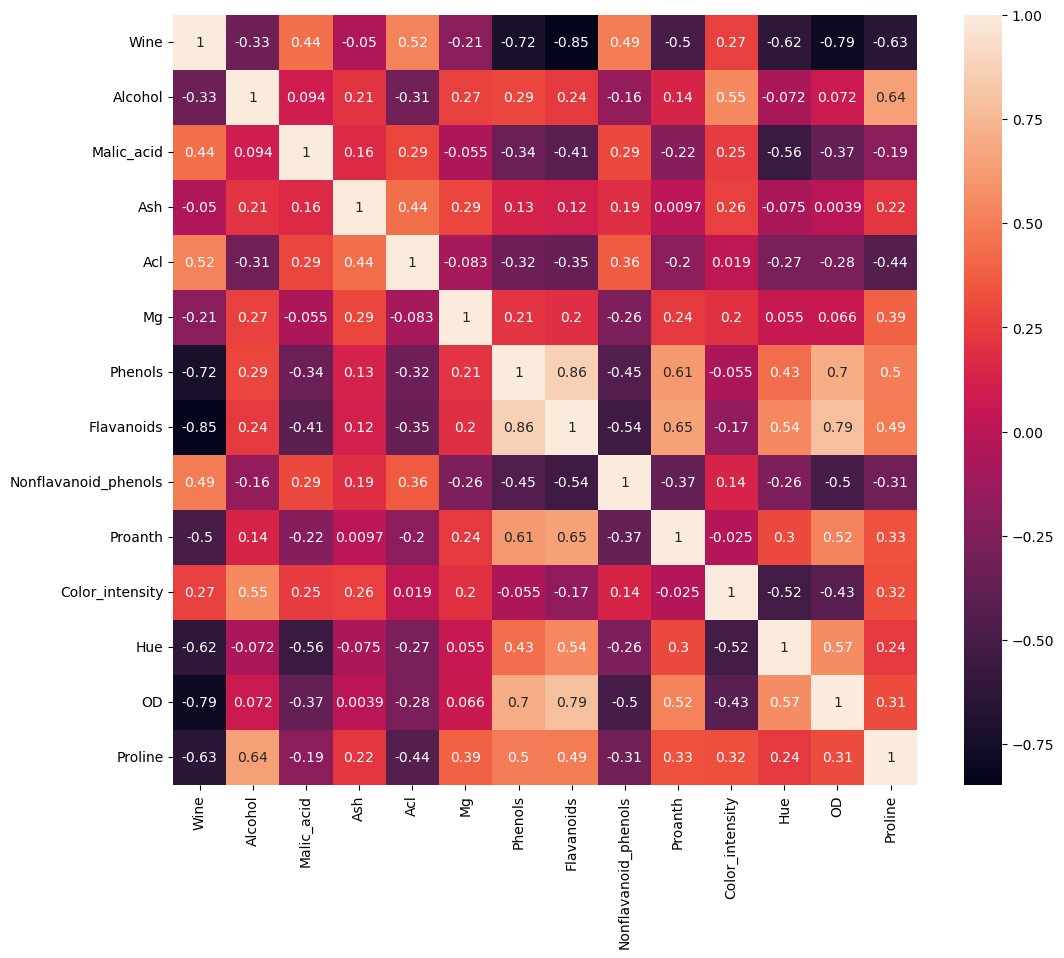

In [3]:
import seaborn as sns

fig, ax = plt.subplots( figsize = ( 12 , 10 ) )
sns.heatmap(df.corr(method='pearson'), annot = True)

#### Feature selection using chi-squared test

In [4]:
from sklearn.feature_selection import chi2

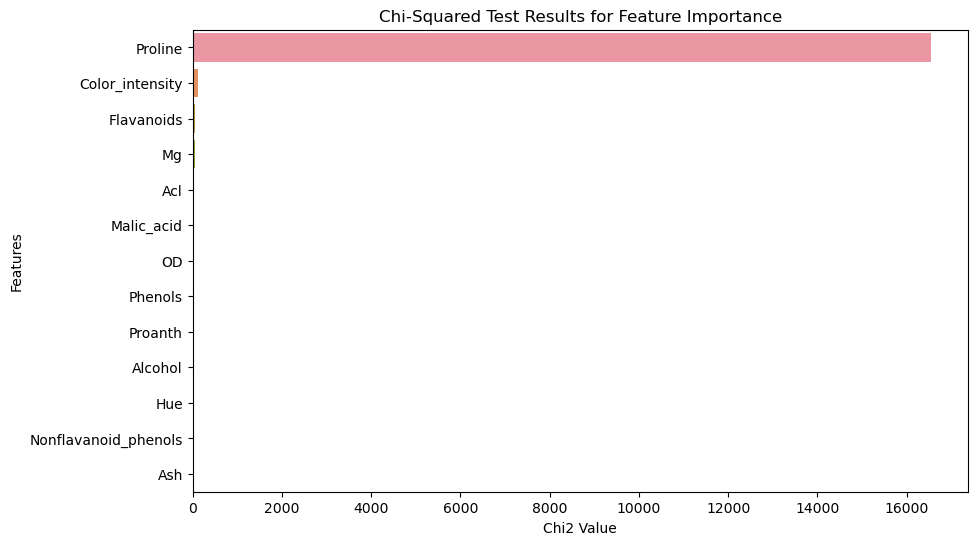

                 Feature    Chi2 Value       P-Value
12               Proline  16540.067145  0.000000e+00
9        Color_intensity    109.016647  2.124887e-24
6             Flavanoids     63.334308  1.766565e-14
4                     Mg     45.026381  1.669728e-10
3                    Acl     29.383695  4.163050e-07
1             Malic_acid     28.068605  8.034890e-07
11                    OD     23.389883  8.335878e-06
5                Phenols     15.623076  4.050346e-04
8                Proanth      9.368283  9.240664e-03
0                Alcohol      5.445499  6.569389e-02
10                   Hue      5.182540  7.492483e-02
7   Nonflavanoid_phenols      1.815485  4.034340e-01
2                    Ash      0.743381  6.895678e-01


In [5]:
X = df.drop(columns=['Wine'])
y = df['Wine']

chi2_values, p_values = chi2(X, y)

chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Value': chi2_values,
    'P-Value': p_values
}).sort_values(by='Chi2 Value', ascending=False)

# Step 5: Visualize the results with a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Chi2 Value', y='Feature', data=chi2_results)
plt.title('Chi-Squared Test Results for Feature Importance')
plt.xlabel('Chi2 Value')
plt.ylabel('Features')
plt.show()

# Optional: Display the chi-squared and p-values
print(chi2_results)

##### Fairer Comparison of Variance With Feature Normalization
Often, it is not fair to compare the variance of a feature to another. The reason is that as the values in the distribution get bigger, the variance grows exponentially. In other words, the variances will not be on the same scale.

In [6]:
X.describe()

Alcohol  Malic_acid         Ash         Acl          Mg     Phenols  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    2.336348    2.366517   19.494944   99.741573    2.295112   
std      0.811827    1.117146    0.274344    3.339564   14.282484    0.625851   
min     11.030000    0.740000    1.360000   10.600000   70.000000    0.980000   
25%     12.362500    1.602500    2.210000   17.200000   88.000000    1.742500   
50%     13.050000    1.865000    2.360000   19.500000   98.000000    2.355000   
75%     13.677500    3.082500    2.557500   21.500000  107.000000    2.800000   
max     14.830000    5.800000    3.230000   30.000000  162.000000    3.880000   

       Flavanoids  Nonflavanoid_phenols     Proanth  Color_intensity  \
count  178.000000            178.000000  178.000000       178.000000   
mean     2.029270              0.361854    1.590899         5.058090   
std      0.998859              0.124453    0.572359         2.318286   
min      0.340000              0.130000    0.410000         1.280000   
25%      1.205000              0.270000    1.250000         3.220000   
50%      2.135000              0.340000    1.555000         4.690000   
75%      2.875000              0.437500    1.950000         6.200000   
max      5.080000              0.660000    3.580000        13.000000   

              Hue          OD      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

#### Feature selection using correlation

<Axes: >

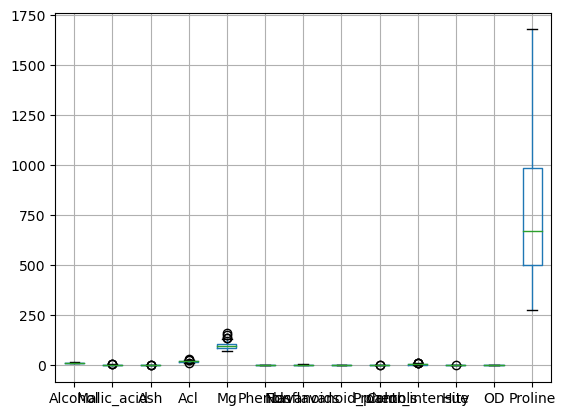

In [7]:
X.boxplot()

The above features all have different medians, quartiles, and ranges — completely different distributions. We cannot compare these features to each other.

One method we can use is scale all features using the Robust Scaler which is not highly affected by outliers:

In [8]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(X)
scaled_data = transformer.transform(X)
X_scaled = pd.DataFrame(scaled_data, columns=X.columns)

This method ensures that all variances are on the same scale:

In [9]:
X_scaled.var()

Alcohol                 0.381132
Malic_acid              0.569766
Ash                     0.623277
Acl                     0.603174
Mg                      0.565067
Phenols                 0.350252
Flavanoids              0.357746
Nonflavanoid_phenols    0.552056
Proanth                 0.668561
Color_intensity         0.605204
Hue                     0.458666
OD                      0.331842
Proline                 0.422453
dtype: float64

In [10]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.35)
# Learn variances from X_scaled
_ = selector.fit(X_scaled)
# Get a mask (or integer index if indices=True is set) of the features selected
mask = selector.get_support()
print(mask)
# get the subset of features selected
X_transformed = X_scaled.loc[:,mask]
X_transformed

[ True  True  True  True  True False  True  True  True  True  True False
  True]


Alcohol  Malic_acid       Ash       Acl        Mg  Flavanoids  \
0    0.897338   -0.104730  0.201439 -0.906977  1.526316    0.553892   
1    0.114068   -0.057432 -0.633094 -1.930233  0.105263    0.374251   
2    0.083650    0.334459  0.892086 -0.209302  0.157895    0.661677   
3    1.003802    0.057432  0.402878 -0.627907  0.789474    0.811377   
4    0.144487    0.489865  1.467626  0.348837  1.052632    0.332335   
..        ...         ...       ...       ...       ...         ...   
173  0.501901    2.557432  0.258993  0.232558 -0.157895   -0.913174   
174  0.266160    1.381757  0.345324  0.813953  0.210526   -0.829341   
175  0.167300    1.631757 -0.287770  0.116279  1.157895   -0.865269   
176  0.091255    0.489865  0.028777  0.116279  1.157895   -0.871257   
177  0.821293    1.510135  1.093525  1.162791 -0.105263   -0.823353   

     Nonflavanoid_phenols   Proanth  Color_intensity       Hue   Proline  
0               -0.358209  1.050000         0.318792  0.222222  0.808050  
1               -0.477612 -0.392857        -0.104027  0.251852  0.777090  
2               -0.238806  1.792857         0.332215  0.192593  1.055728  
3               -0.597015  0.892857         1.043624 -0.311111  1.664603  
4                0.298507  0.378571        -0.124161  0.222222  0.126935  
..                    ...       ...              ...       ...       ...  
173              1.074627 -0.707143         1.010067 -0.962963  0.137255  
174              0.537313 -0.207143         0.875839 -0.785185  0.157895  
175              0.537313 -0.292857         1.848993 -1.111111  0.333333  
176              1.134328 -0.135714         1.546980 -1.081481  0.343653  
177              1.313433 -0.292857         1.513423 -1.051852 -0.234262  

[178 rows x 11 columns]

#### Feature selection using feature importance

Feature ranking:
1. feature 12 - Proline (0.240954)
2. feature 11 - OD (0.162438)
3. feature 6 - Flavanoids (0.149339)
4. feature 0 - Alcohol (0.127384)
5. feature 9 - Color_intensity (0.125520)
6. feature 10 - Hue (0.072550)
7. feature 5 - Phenols (0.031640)
8. feature 1 - Malic_acid (0.027186)
9. feature 4 - Mg (0.021927)
10. feature 3 - Acl (0.013679)
11. feature 8 - Proanth (0.012320)
12. feature 2 - Ash (0.010575)
13. feature 7 - Nonflavanoid_phenols (0.004489)


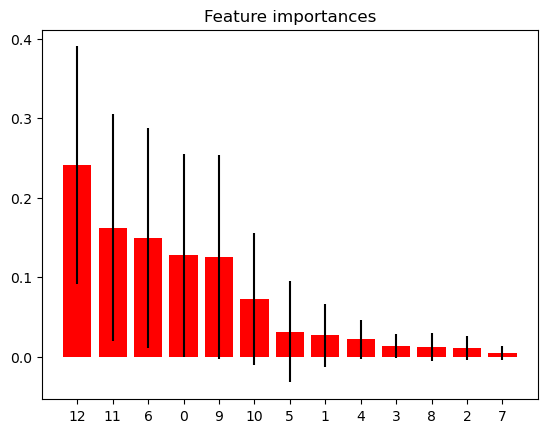

In [11]:
# Feature Importance 1
# Use ensemble method: The goal of ensemble methods is to combine the 
# predictions of several base estimators built with a given learning algorithm 
# in order to improve generalizability / robustness over a single estimator.
# http://scikit-learn.org/stable/modules/ensemble.html
from sklearn.ensemble import ExtraTreesClassifier
# Build an estimator (forest of trees) and compute the feature importances
# n_estimators = number of trees in forest
estimator = ExtraTreesClassifier(n_estimators=100, max_features=13, random_state=0)
estimator.fit(X,y)
# Lets get the feature importances. Features with high importance score higher.
importances = estimator.feature_importances_
std = np.std([tree.feature_importances_ for tree in estimator.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [12]:
# Feature Importance 2
from sklearn.feature_selection import RFE
estimator = ExtraTreesClassifier(n_estimators=100, random_state=0)
# keep the 5 most informative features
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
print(list(selector.support_))
print(list(selector.ranking_))

[True, False, False, False, False, False, True, False, False, True, False, True, True]
[1, 3, 8, 5, 6, 4, 1, 9, 7, 1, 2, 1, 1]


#### Feature selection using Forward selection/Backward elimination

In [13]:
# Example 1
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection
sfs = SFS(knn, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=10)
           
sfs = sfs.fit(X_scaled, y)

print('\nSequential Forward Selection (k=5):')
print('Selected features:',sfs.k_feature_idx_)
print('Prediction score:',sfs.k_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.3s finished

[2024-10-09 15:14:01] Features: 1/5 -- score: 0.7810457516339869[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.8s finished

[2024-10-09 15:14:02] Features: 2/5 -- score: 0.9212418300653595[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.7s finished

[2024-10-09 15:14:02] Features: 3/5 -- score: 0.9493464052287581[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 


Sequential Forward Selection (k=5):
Selected features: (1, 4, 6, 9, 12)
Prediction score: 0.9663398692810456


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s finished

[2024-10-09 15:14:04] Features: 5/5 -- score: 0.9663398692810456

In [14]:
# Example 2
# Sequential Backward Selection
sbs = SFS(knn, 
          k_features=5, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=10)
sbs = sbs.fit(X_scaled, y)

print('\nSequential Backward Selection (k=5):')
print('Selected features:',sbs.k_feature_idx_)
print('Prediction (CV) score:',sbs.k_score_)


Sequential Backward Selection (k=5):
Selected features: (0, 2, 8, 9, 12)
Prediction (CV) score: 0.9607843137254901


In [15]:
# Example 3
print(pd.DataFrame.from_dict(sbs.get_metric_dict()).T)

                                   feature_idx  \
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
12     (0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
11        (0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12)   
10            (0, 2, 3, 5, 6, 7, 8, 9, 10, 12)   
9                (0, 2, 3, 5, 7, 8, 9, 10, 12)   
8                   (0, 2, 3, 5, 8, 9, 10, 12)   
7                      (0, 2, 3, 8, 9, 10, 12)   
6                          (0, 2, 3, 8, 9, 12)   
5                             (0, 2, 8, 9, 12)   

                                            cv_scores avg_score  \
13  [0.8888888888888888, 0.9444444444444444, 0.888...  0.937908   
12  [0.8333333333333334, 0.9444444444444444, 0.888...  0.949673   
11  [0.9444444444444444, 0.9444444444444444, 0.944...   0.96634   
10  [0.9444444444444444, 0.9444444444444444, 0.944...  0.971895   
9   [0.9444444444444444, 0.9444444444444444, 1.0, ...  0.971895   
8   [0.9444444444444444, 0.8888888888888888, 1.0, ...  0.977778   
7   [0.9444444444444444, 0.888

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.8s finished

[2024-10-09 15:14:11] Features: 1/5 -- score: 0.7810457516339869[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.8s finished

[2024-10-09 15:14:12] Features: 2/5 -- score: 0.9212418300653595[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.6s finished

[2024-10-09 15:14:13] Features: 3/5 -- score: 0.9493464052287581[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

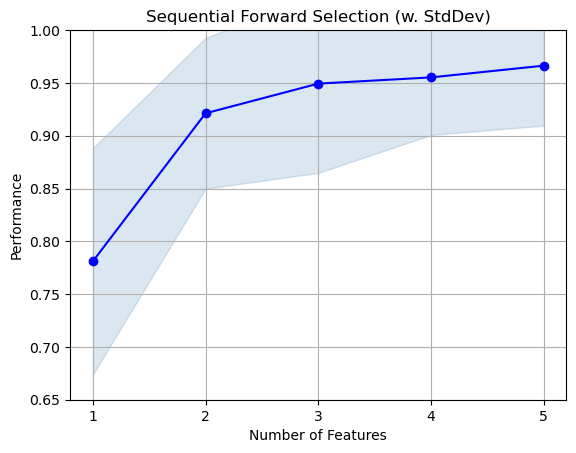

In [16]:
# Example 4
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

sfs = SFS(knn, 
          k_features=5, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          verbose=2,
          cv=10)

sfs = sfs.fit(X_scaled, y)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.65, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

best combination (ACC: 0.972): (1, 4, 6, 9, 10, 11, 12)

all subsets:
 {1: {'feature_idx': (6,), 'cv_scores': array([0.61111111, 0.72222222, 0.88888889, 0.88888889, 0.72222222,
       0.66666667, 0.94444444, 0.77777778, 0.88235294, 0.70588235]), 'avg_score': 0.7810457516339869, 'feature_names': ('Flavanoids',)}, 2: {'feature_idx': (6, 9), 'cv_scores': array([0.77777778, 0.83333333, 0.88888889, 0.94444444, 1.        ,
       0.94444444, 1.        , 1.        , 0.88235294, 0.94117647]), 'avg_score': 0.9212418300653595, 'feature_names': ('Flavanoids', 'Color_intensity')}, 3: {'feature_idx': (4, 6, 9), 'cv_scores': array([0.72222222, 1.        , 0.94444444, 1.        , 1.        ,
       0.94444444, 1.        , 1.        , 0.88235294, 1.        ]), 'avg_score': 0.9493464052287581, 'feature_names': ('Mg', 'Flavanoids', 'Color_intensity')}, 4: {'feature_idx': (4, 6, 9, 12), 'cv_scores': array([0.83333333, 1.        , 0.88888889, 0.94444444, 1.        ,
       1.        , 1.        , 0.944444

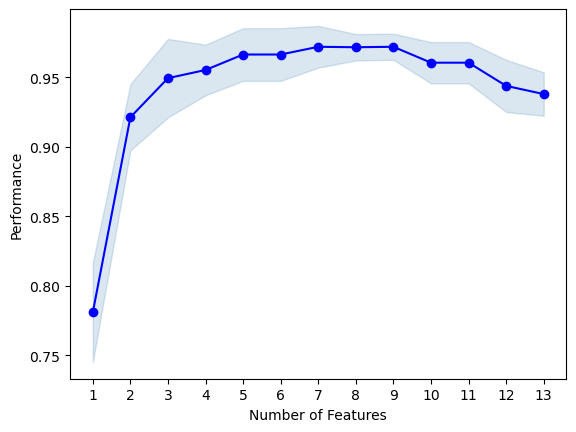

In [17]:
# Example 5
knn = KNeighborsClassifier(n_neighbors=4)

sfs_range = SFS(estimator=knn, 
           k_features=(2, 13),
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=10)

sfs_range = sfs_range.fit(X_scaled, y)

print('best combination (ACC: %.3f): %s\n' % (sfs_range.k_score_, sfs_range.k_feature_idx_))
print('all subsets:\n', sfs_range.subsets_)
plot_sfs(sfs_range.get_metric_dict(), kind='std_err');
plt.show()

#### Feature Extraction

PCA explained variance ratio (first 10 components): [0.32853032 0.19681405 0.12684328 0.07788489 0.06968107 0.05607506
 0.04809657 0.02541638 0.02091117 0.01754752]


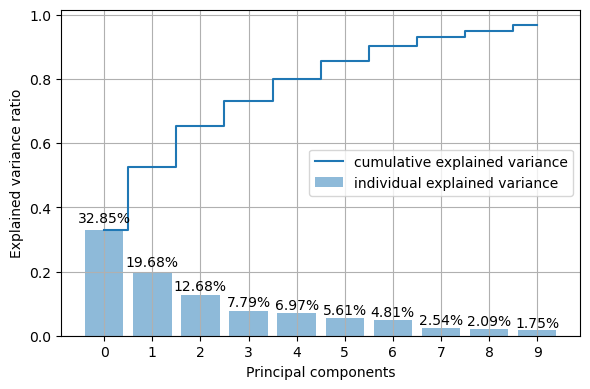

In [18]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = iris.data
iris_target = iris.target
num_of_classes = len(set(iris_target))

def print_2d_scatter_plot(features, target, title, n_components):
    newDf=pd.DataFrame(features, columns=['Feature '+str(i) for i in range(features.shape[1])])
    newDf['target']=target
    sns.scatterplot(data=newDf, x='Feature 0', y='Feature 1', hue='target').set(title=title+', '+str(n_components)+' components')
    plt.show() 
    
def print_variance_explained_plot(obj, n_components):
    cum_var_exp = np.cumsum(obj.explained_variance_ratio_)
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(range(n_components), obj.explained_variance_ratio_, alpha=0.5, align='center',
                label='individual explained variance')
    # show percentage of explained variance on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1.05*height, '%.2f%%' % (height*100), 
                ha='center', va='bottom')
    plt.step(range(n_components), cum_var_exp, where='mid',
                 label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.xticks( range(n_components) )
    plt.grid(True)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# PCA on the wine dataset
from sklearn.decomposition import PCA
components = 10
pca = PCA(n_components=components)
wine_pca = pca.fit_transform(X_scaled)
# Percentage of variance explained for each components
print('PCA explained variance ratio (first '+str(components)+' components): %s'
      % str(pca.explained_variance_ratio_))
print_variance_explained_plot(pca,components)

#### Feature Extraction example using PCA, SVD and LDA

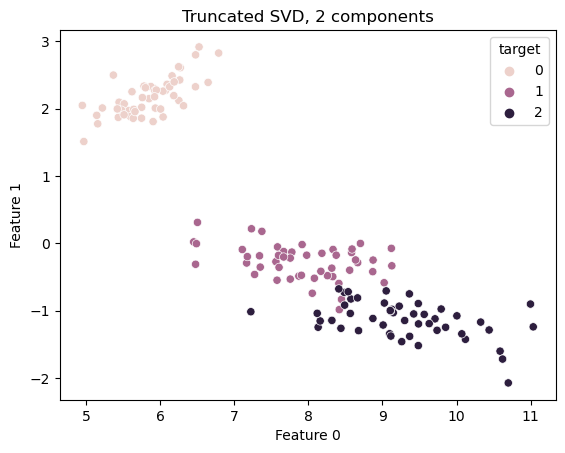

TruncatedSVD explained variance ratio (first two components): [0.52875361 0.44845576]


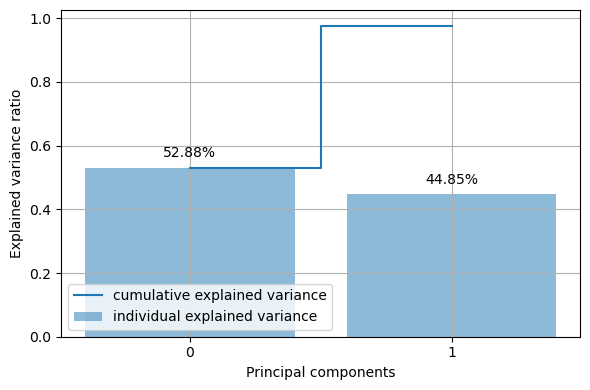

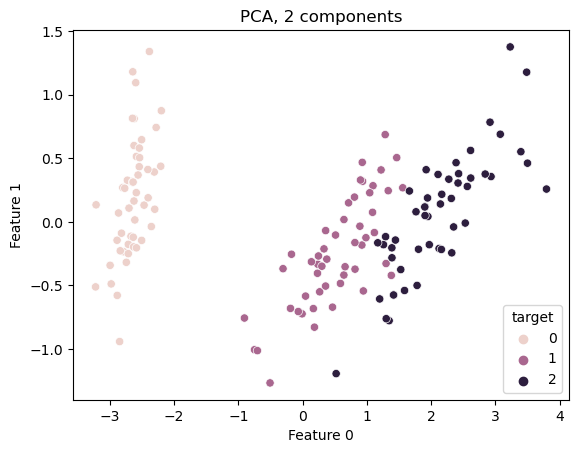

PCA explained variance ratio (first two components): [0.92461872 0.05306648]


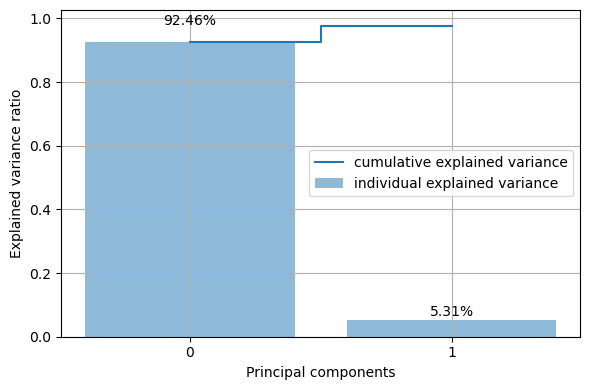

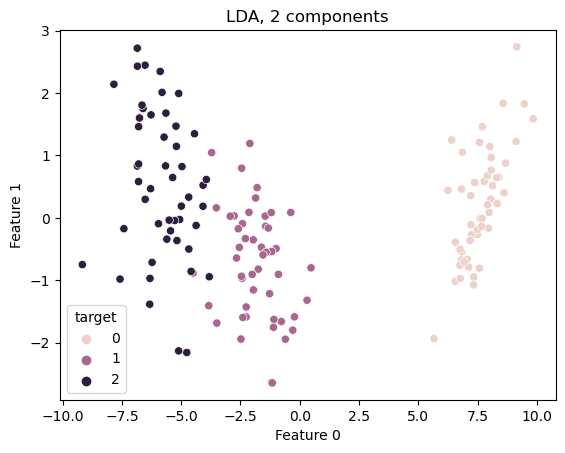

LDA explained variance ratio (first two components): [0.9912126 0.0087874]


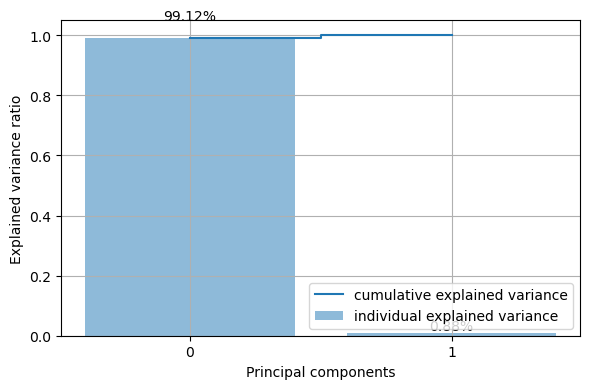

In [19]:
# Truncated SVD
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(2)
iris_tsvd = tsvd.fit_transform(iris_data)
print_2d_scatter_plot(iris_tsvd, iris_target, 'Truncated SVD', 2)
# Percentage of variance explained for each components
print('TruncatedSVD explained variance ratio (first two components): %s'
      % str(tsvd.explained_variance_ratio_))
print_variance_explained_plot(tsvd,2)

# PCA (no need to scale features because all features on the same scale)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_data)
print_2d_scatter_plot(iris_pca, iris_target, 'PCA', 2)
# Percentage of variance explained for each components
print('PCA explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
print_variance_explained_plot(pca,2)

# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
iris_lda = lda.fit(iris_data, iris_target).transform(iris_data)
print_2d_scatter_plot(iris_lda, iris_target, 'LDA', 2)
# Percentage of variance explained for each components
print('LDA explained variance ratio (first two components): %s'
      % str(lda.explained_variance_ratio_))
print_variance_explained_plot(lda,2)